In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#read in training data
train_df=pd.read_csv('data/red-wine.csv')

#view data structure
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#create a dataframe with all training data except the target column
train_X=train_df.drop(columns=['quality'])

#The training matrix
train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
#create a dataframe with only the target column
train_Y=train_df[['quality']]

#View target dataset
train_Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [5]:
# No of features or inputs in the neural network 
input_count=train_X.shape[1]

# Defining the NN model
model=keras.Sequential([
    layers.Dense(units=11, input_shape=[input_count],activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(units=11,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(units=11,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(units=1)
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_1 (Batch (None, 11)                44        
_________________________________________________________________
dense_2 (Dense)              (None, 11)                132       
_________________________________________________________________
batch_normalization_2 (Batch (None, 11)                44        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [6]:
# Setup the learning rate, target function to be used
model.compile(optimizer='adam',loss='mae')

In [7]:
early_stopping = EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [8]:
#Real Training happens here
history=model.fit(
    train_X,
    train_Y,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=200,
    epochs=100,
    verbose=0)

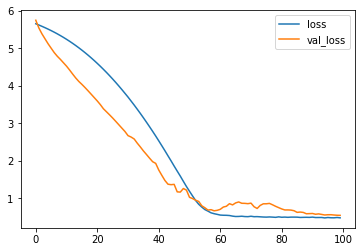

In [9]:
# Plot the loss 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [10]:
# Input Test set
row_no=0
test_x=train_X[row_no:1]
test_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
# Target Output Value
test_y=train_Y[row_no:1]
test_y

,quality
0,5


In [12]:
# Show prediction vs real
actual=model.predict(test_x)

In [13]:
df2=pd.DataFrame([[actual[0,0],test_y.values[0][0],abs(test_y.values[0][0]-actual[0,0])]],columns=['Actual Output from NN', 'Expected Value', 'Error'])
df2


,Actual Output from NN,Expected Value,Error
0,4.501773,5,0.498227
